In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer, PowerTransformer
from sklearn.linear_model import ElasticNetCV
import numpy as np
from scipy.spatial.distance import mahalanobis
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, RobustScaler, StandardScaler, QuantileTransformer, PowerTransformer
import matplotlib.pyplot as plt
import base64
from io import BytesIO
from sklearn.linear_model import ElasticNetCV
from sklearn.model_selection import train_test_split
import matplotlib.cm as cm
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import base64
from io import BytesIO
from sklearn.linear_model import ElasticNetCV
from sklearn.model_selection import train_test_split
import matplotlib.cm as cm
from sklearn.manifold import TSNE
import plotly.express as px
from sklearn.decomposition import PCA
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np


In [2]:
!pip install umap-learn
!pip install scikit-learn-extra


In [3]:
import umap
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler
from sklearn_extra.cluster import KMedoids
import numpy as np
import pandas as pd
import plotly.express as px
import umap

# Data Pre-Processing

In [4]:
#loading the dataset into a dataframe using pandas
df_unsw=pd.read_csv("UNSW_NB15_testing-set.csv")
df_unsw

id       dur proto service state  spkts  dpkts  sbytes  dbytes  \
0            1  0.121478   tcp       -   FIN      6      4     258     172   
1            2  0.649902   tcp       -   FIN     14     38     734   42014   
2            3  1.623129   tcp       -   FIN      8     16     364   13186   
3            4  1.681642   tcp     ftp   FIN     12     12     628     770   
4            5  0.449454   tcp       -   FIN     10      6     534     268   
...        ...       ...   ...     ...   ...    ...    ...     ...     ...   
175336  175337  0.000009   udp     dns   INT      2      0     114       0   
175337  175338  0.505762   tcp       -   FIN     10      8     620     354   
175338  175339  0.000009   udp     dns   INT      2      0     114       0   
175339  175340  0.000009   udp     dns   INT      2      0     114       0   
175340  175341  0.000009   udp     dns   INT      2      0     114       0   

                 rate  ...  ct_dst_sport_ltm  ct_dst_src_ltm  is_ftp_login  \
0           74.087490  ...                 1               1             0   
1           78.473372  ...                 1               2             0   
2           14.170161  ...                 1               3             0   
3           13.677108  ...                 1               3             1   
4           33.373826  ...                 1              40             0   
...               ...  ...               ...             ...           ...   
175336  111111.107200  ...                13              24             0   
175337      33.612649  ...                 1               2             0   
175338  111111.107200  ...                 3              13             0   
175339  111111.107200  ...                14              30             0   
175340  111111.107200  ...                16              30             0   

        ct_ftp_cmd  ct_flw_http_mthd  ct_src_ltm  ct_srv_dst  is_sm_ips_ports  \
0                0                 0           1           1                0   
1                0                 0           1           6                0   
2                0                 0           2           6                0   
3                1                 0           2           1                0   
4                0                 0           2          39                0   
...            ...               ...         ...         ...              ...   
175336           0                 0          24          24                0   
175337           0                 0           1           1                0   
175338           0                 0           3          12                0   
175339           0                 0          30          30                0   
175340           0                 0          30          30                0   

        attack_cat  label  
0           Normal      0  
1           Normal      0  
2           Normal      0  
3           Normal      0  
4           Normal      0  
...            ...    ...  
175336     Generic      1  
175337   Shellcode      1  
175338     Generic      1  
175339     Generic      1  
175340     Generic      1  

[175341 rows x 45 columns]

In [5]:
#eliminating unnecessary features
df_unsw=df_unsw.drop(['id','dur'],axis=1)

In [6]:
df_unsw.shape

(175341, 43)

# Label Encoding

In [7]:
#label encoding is done for features that are object type
label_encoder = LabelEncoder()

# Assuming 'proto', 'service', and 'state' are the nominal features
object_features = ['proto', 'service', 'state']
for feature in object_features:
    df_unsw[feature] = label_encoder.fit_transform(df_unsw[feature])


C:\Users\Student\anaconda3\lib\site-packages\scipy\spatial\distance.py:1064: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(m)


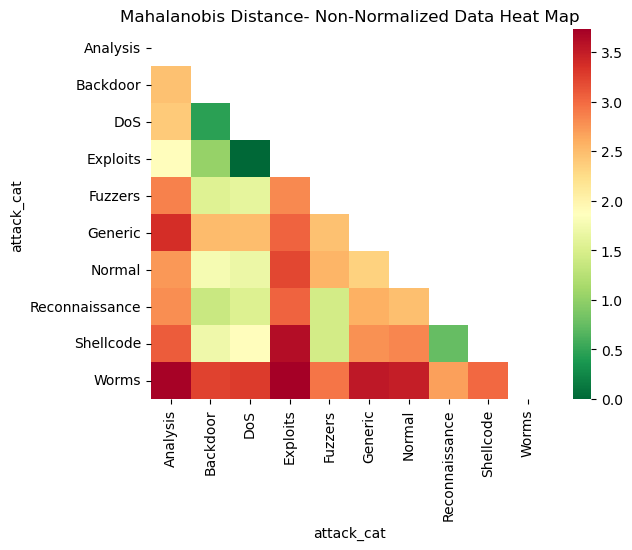

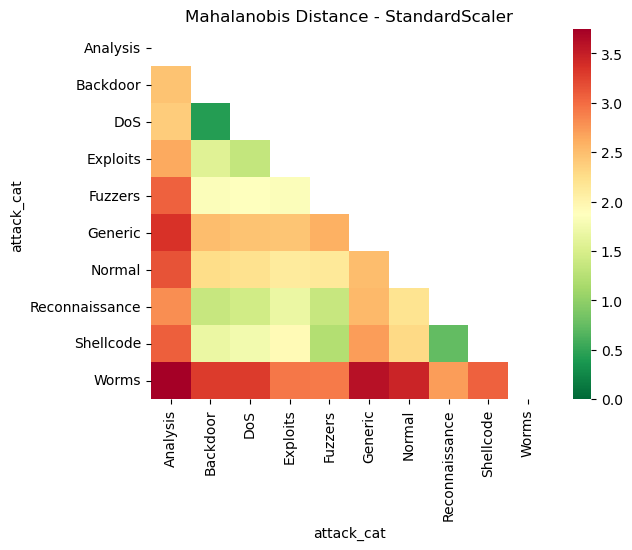

In [8]:
data_df = df_unsw

# Define a function to calculate the Mahalanobis distance matrix for a given DataFrame
def mahalanobis_distance(data, class_attribute):
    # Calculate the inverse of the covariance matrix
    inverse_covariance_matrix = np.linalg.inv(data.cov())

    # Calculate the centroids of each class
    each_class_centroids = data.groupby(class_attribute).mean()

    # Calculate the Mahalanobis distance between each pair of centroids
    distances = pd.DataFrame(index=each_class_centroids.index, columns=each_class_centroids.index)

    for i in each_class_centroids.index:
        for j in each_class_centroids.index:
            distances.loc[i, j] = mahalanobis(each_class_centroids.loc[i], each_class_centroids.loc[j], inverse_covariance_matrix)

    return distances.astype(float)

# Calculate and plot the Mahalanobis distance matrix for the original dataset
class_mahalanobis_matrix = mahalanobis_distance(data_df.drop('attack_cat', axis=1), data_df['attack_cat'])
removal_mask = np.triu(np.ones_like(class_mahalanobis_matrix, dtype=bool))

# Plot the heatmap with the mask
masked_mahalanobis_matrix = class_mahalanobis_matrix.fillna(0)
sns.heatmap(masked_mahalanobis_matrix, cmap='RdYlGn_r', mask=removal_mask,vmin=0,vmax=class_mahalanobis_matrix.max().max())
plt.title('Mahalanobis Distance- Non-Normalized Data Heat Map')
plt.show()


# List of scalers to be applied
scalers = [MinMaxScaler(), MaxAbsScaler(), RobustScaler(), StandardScaler(), QuantileTransformer(), PowerTransformer()]
scaler_names = ['MinMaxScaler', 'MaxAbsScaler', 'RobustScaler', 'StandardScaler', 'QuantileTransformer', 'PowerTransformer']

# Apply each scaler, calculate Mahalanobis distance matrix, and plot heatmap
for scaler, name in zip(scalers, scaler_names):
    scaled_attributes = scaler.fit_transform(data_df.drop(['attack_cat'], axis=1))
    scaled_data = pd.DataFrame(scaled_attributes, columns=data_df.columns[:-1])
    scaled_data['attack_cat'] = data_df['attack_cat'].values  # Add the class label back

    mahalanobis_distance_matrix = mahalanobis_distance(scaled_data.drop('attack_cat', axis=1), scaled_data['attack_cat'])
    modified_matrix = mahalanobis_distance_matrix.fillna(0)
    sns.heatmap(modified_matrix, cmap='RdYlGn_r', mask=removal_mask, vmin=0, vmax=modified_matrix.max().max())
    plt.title(f'Mahalanobis Distance - {name}')
    plt.show()

In [9]:
import matplotlib.pyplot as plt
import base64
from io import BytesIO
from sklearn.linear_model import ElasticNetCV
from sklearn.model_selection import train_test_split
import matplotlib.cm as cm
import plotly.graph_objects as go
from plotly.subplots import make_subplots


data_df = df_unsw

# Mask upper triangle of heatmap
def mask_upper_triangle_heat_map(matrix_distance):
    mask_triangle = np.triu(np.ones_like(matrix_distance, dtype=bool))
    matrix_masked_up = matrix_distance.where(~mask_triangle, None)  # Set upper triangle to None
    return matrix_masked_up

# Calculate the Mahalanobis distance matrix for the original dataset and mask it


class_mahalanobis_matrix = mahalanobis_distance(data_df.drop('attack_cat', axis=1), data_df['attack_cat'])
class_mahalanobis_matrix=class_mahalanobis_matrix.fillna(0)
masked_class_mahalanobis_matrix = mask_upper_triangle_heat_map(class_mahalanobis_matrix)

class_names=class_mahalanobis_matrix.columns.tolist()
# Create a subplot with 1 row and 7 columns
fig1 = make_subplots(rows=1, cols=7, subplot_titles=('Original', 'MinMaxScaler', 'MaxAbsScaler', 'RobustScaler', 'StandardScaler', 'QuantileTransformer', 'PowerTransformer'), horizontal_spacing=0.01)

# Plot the interactive heatmap for the original dataset
fig1.add_trace(
    go.Heatmap(x=class_names,y=class_names,z=masked_class_mahalanobis_matrix.to_numpy(), colorscale='RdYlGn_r',showscale=True),
    row=1, col=1
)

# Counter for subplot columns
column_counter = 2

# List of scalers to be applied
scalers = [MinMaxScaler(), MaxAbsScaler(), RobustScaler(), StandardScaler(), QuantileTransformer(), PowerTransformer()]
scaler_names = ['MinMaxScaler', 'MaxAbsScaler', 'RobustScaler', 'StandardScaler', 'QuantileTransformer', 'PowerTransformer']

# Apply each scaler, calculate Mahalanobis distance matrix, mask it, and plot interactive heatmap
for scaler, name in zip(scalers, scaler_names):
    scaled_features = scaler.fit_transform(data_df.drop(['attack_cat'], axis=1))
    scaled_data = pd.DataFrame(scaled_features, index=data_df.index, columns=data_df.columns[:-1])
    scaled_data['attack_cat'] = data_df['attack_cat'].values  # Add the class label back

    mahalanobis_matrix_scaled = mahalanobis_distance(scaled_data.drop('attack_cat', axis=1), scaled_data['attack_cat'])
    mahalanobis_matrix_scaled=mahalanobis_matrix_scaled.fillna(0)
    mahalanobis_matrix_masked_scaled = mask_upper_triangle_heat_map(mahalanobis_matrix_scaled)

    # Plot the interactive heatmap
    fill_matrix = mahalanobis_matrix_scaled.fillna(9999)

    z_min = mahalanobis_matrix_masked_scaled.min().min()
    z_max = mahalanobis_matrix_masked_scaled.max().max()

    # Plot the interactive heatmap
    fig1.add_trace(
        go.Heatmap(
            z=mahalanobis_matrix_masked_scaled.to_numpy(),
            colorscale='RdYlGn_r',
            zmin=z_min,
            zmax=z_max,
            showscale=True, x=class_names,y=class_names # Show individual color scale for each heatma
        ),
        row=1, col=column_counter
    )

    column_counter += 1




fig1.update_layout(height=600, width=4200, title_text="Mahalanobis Distance Heat Maps")
fig1.update_yaxes(autorange="reversed")

fig1.show()

# Save to an HTML file
fig1.write_html("HeatMaps.html")



C:\Users\Student\anaconda3\lib\site-packages\scipy\spatial\distance.py:1064: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(m)


In [10]:
scaler=MinMaxScaler()
scaled_attributes = scaler.fit_transform(data_df.drop(['attack_cat'], axis=1))
scaled_data_df = pd.DataFrame(scaled_attributes, index=data_df.index, columns=data_df.columns[:-1])
scaled_data_df['attack_cat'] = data_df['attack_cat'].values  # Add the class label back

In [11]:
scaled_data_df

proto   service  state     spkts     dpkts    sbytes    dbytes  \
0       0.856061  0.000000  0.250  0.000520  0.000364  0.000018  0.000012   
1       0.856061  0.000000  0.250  0.001352  0.003463  0.000054  0.002867   
2       0.856061  0.000000  0.250  0.000728  0.001458  0.000026  0.000900   
3       0.856061  0.250000  0.250  0.001144  0.001093  0.000046  0.000053   
4       0.856061  0.000000  0.250  0.000936  0.000547  0.000039  0.000018   
...          ...       ...    ...       ...       ...       ...       ...   
175336  0.901515  0.166667  0.375  0.000104  0.000000  0.000007  0.000000   
175337  0.856061  0.000000  0.250  0.000936  0.000729  0.000046  0.000024   
175338  0.901515  0.166667  0.375  0.000104  0.000000  0.000007  0.000000   
175339  0.901515  0.166667  0.375  0.000104  0.000000  0.000007  0.000000   
175340  0.901515  0.166667  0.375  0.000104  0.000000  0.000007  0.000000   

            rate      sttl      dttl  ...  ct_src_dport_ltm  ct_dst_sport_ltm  \
0       0.000074  0.988235  1.000000  ...              0.00          0.000000   
1       0.000078  0.243137  0.992126  ...              0.00          0.000000   
2       0.000014  0.243137  0.992126  ...              0.00          0.000000   
3       0.000014  0.243137  0.992126  ...              0.00          0.000000   
4       0.000033  0.996078  0.992126  ...              0.02          0.000000   
...          ...       ...       ...  ...               ...               ...   
175336  0.111111  0.996078  0.000000  ...              0.46          0.266667   
175337  0.000034  0.996078  0.992126  ...              0.00          0.000000   
175338  0.111111  0.996078  0.000000  ...              0.04          0.044444   
175339  0.111111  0.996078  0.000000  ...              0.58          0.288889   
175340  0.111111  0.996078  0.000000  ...              0.58          0.333333   

        ct_dst_src_ltm  is_ftp_login  ct_ftp_cmd  ct_flw_http_mthd  \
0             0.000000          0.00        0.00               0.0   
1             0.015625          0.00        0.00               0.0   
2             0.031250          0.00        0.00               0.0   
3             0.031250          0.25        0.25               0.0   
4             0.609375          0.00        0.00               0.0   
...                ...           ...         ...               ...   
175336        0.359375          0.00        0.00               0.0   
175337        0.015625          0.00        0.00               0.0   
175338        0.187500          0.00        0.00               0.0   
175339        0.453125          0.00        0.00               0.0   
175340        0.453125          0.00        0.00               0.0   

        ct_src_ltm  ct_srv_dst  is_sm_ips_ports  attack_cat  
0         0.000000    0.000000              0.0      Normal  
1         0.000000    0.081967              0.0      Normal  
2         0.016949    0.081967              0.0      Normal  
3         0.016949    0.000000              0.0      Normal  
4         0.016949    0.622951              0.0      Normal  
...            ...         ...              ...         ...  
175336    0.389831    0.377049              0.0     Generic  
175337    0.000000    0.000000              0.0   Shellcode  
175338    0.033898    0.180328              0.0     Generic  
175339    0.491525    0.475410              0.0     Generic  
175340    0.491525    0.475410              0.0     Generic  

[175341 rows x 42 columns]

In [12]:
import matplotlib.pyplot as plt
import base64
from io import BytesIO
from sklearn.linear_model import ElasticNetCV
from sklearn.model_selection import train_test_split
import matplotlib.cm as cm

label_encoder = LabelEncoder()

# Assuming 'proto', 'service', and 'state' are the nominal features
nominal_attributes = ['attack_cat']
for feature in nominal_attributes:
    scaled_data_df[feature] = label_encoder.fit_transform(scaled_data_df[feature])
# Assuming scaled_df is your DataFrame after Min-Max scaling and 'attack_cat' is the target variable
X = scaled_data_df.drop('attack_cat', axis=1).values  # features
y = scaled_data_df['attack_cat'].values  # target

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the ElasticNetCV model
elastic_net_cv_model = ElasticNetCV(l1_ratio=0.5, alphas=np.logspace(-4, -1, 100), cv=5, random_state=42)

# Fit the model
elastic_net_cv_model.fit(X_train, y_train)

# ... Your existing setup code for ElasticNetCV and fitting the model ...

# Plot the MSE path (Figure 3)
mse_path_elastic= elastic_net_cv_model.mse_path_
avg_mse_elastic = np.mean(mse_path_elastic, axis=1)
sem_mse_elastic= np.std(mse_path_elastic, axis=1) / np.sqrt(elastic_net_cv_model.cv)
colors = cm.rainbow(np.linspace(0, 1, mse_path_elastic.shape[1]))


plt.figure(figsize=(10, 6))
for i in range(mse_path_elastic.shape[1]):
    plt.plot(elastic_net_cv_model.alphas_, mse_path_elastic[:, i], linestyle='-', color=colors[i], alpha=0.5)

# Plot the average MSE across the folds with standard error
plt.plot(elastic_net_cv_model.alphas_, avg_mse_elastic, label='Average across the folds', linewidth=2, color='black')
plt.fill_between(elastic_net_cv_model.alphas_, avg_mse_elastic - sem_mse_elastic, avg_mse_elastic + sem_mse_elastic, color='grey', alpha=0.2)

# Highlight the selected alpha with a dashed line
plt.axvline(elastic_net_cv_model.alpha_, linestyle='--', color='black', label=f'Alpha: CV Estimate ({elastic_net_cv_model.alpha_:.4f})')

# Additional settings for the plot
plt.xscale('log')
plt.xlabel('Alpha (α)')
plt.ylabel('Mean Squared Error')
plt.title('Figure 3: Mean Squared Error Calculated for Elastic Net Through 5-fold Cross Validation')
plt.legend()
plt.savefig('alpha1.png')
plt.show()



from sklearn.linear_model import enet_path

# Calculate the path for the Elastic Net
alphas, coefs, _ = enet_path(X_train, y_train, l1_ratio=elastic_net_cv_model.l1_ratio, alphas=elastic_net_cv_model.alphas_)

# Plot the regularization path
colors = cm.rainbow(np.linspace(0, 1, coefs.shape[0]))
plt.figure(figsize=(10, 6))
for i in range(coefs.shape[0]):
    plt.plot(-np.log10(alphas), coefs[i, :], linestyle='-', color=colors[i])

plt.axvline(-np.log10(elastic_net_cv_model.alpha_), linestyle='--', color='black', label=f'Alpha: CV Estimate ({elastic_net_cv_model.alpha_:.4f})')
plt.xlabel('Log10(alpha)')
plt.ylabel('Coefficients')
plt.title('Figure 4: Regularization Path for Elastic Net')
plt.legend()
plt.savefig('alpha2.png')
plt.show()




In [13]:
elastic_net_cv_model.alpha_

0.0001

In [14]:
from sklearn.linear_model import ElasticNet

# Initialize the ElasticNet model with the optimal alpha and l1_ratio determined previously
optimal_alpha_value = elastic_net_cv_model.alpha_
l1_ratio = 0.5  # or the value you used in ElasticNetCV

# Fit the Elastic Net model using the optimal alpha
elasticnet = ElasticNet(alpha=optimal_alpha_value, l1_ratio=l1_ratio, fit_intercept=True)
elasticnet.fit(X_train, y_train)

# Get the coefficients and feature names
coefficients = elasticnet.coef_
feature_names = scaled_data_df.drop('attack_cat', axis=1).columns






# Create a Series to hold feature names and their corresponding coefficients
feature_importance = pd.Series(coefficients, index=feature_names)

# Sort the features by the absolute values of their coefficients in descending order
sorted_attributes = feature_importance.abs().sort_values(ascending=False)



# Print the sorted features with their coefficients
print(sorted_attributes)

# If you need the features as a list, sorted by their importance
sorted_features_list = list(sorted_attributes.index)

# Number of selected features


state                7.701590
ct_flw_http_mthd     4.038858
is_sm_ips_ports      3.966634
swin                 3.227681
dttl                 2.912735
proto                2.242506
ct_srv_src           1.872974
sload                1.555780
ct_dst_sport_ltm     1.541467
sloss                1.492275
dinpkt               1.425257
ct_dst_src_ltm       1.342050
sinpkt               1.188417
sttl                 0.981194
ct_ftp_cmd           0.892366
is_ftp_login         0.892364
dmean                0.884913
ct_dst_ltm           0.828711
smean                0.783874
ct_src_ltm           0.777618
sjit                 0.769563
synack               0.735613
spkts                0.580429
ct_srv_dst           0.573609
dwin                 0.567221
sbytes               0.533126
ct_state_ttl         0.446837
response_body_len    0.382537
dbytes               0.377275
rate                 0.351630
tcprtt               0.295089
service              0.275618
ct_src_dport_ltm     0.208692
dload     

In [15]:
top_24_features = sorted_features_list[0:24]

# Refit the Elastic Net model using only these features
X_train_top = X_train[:, feature_names.isin(top_24_features)]
X_train_top_names = feature_names[feature_names.isin(top_24_features)]

# Calculate the path for the Elastic Net using only the selected features
alpha_values, coefficents, _ = enet_path(X_train_top, y_train, l1_ratio=l1_ratio, alphas=np.logspace(-4, 1, 100))

# Plot the regularization paths for the top features
plt.figure(figsize=(10, 6))
#colors = plt.cm.viridis(np.linspace(0, 1, len(top_features)))
colors = cm.rainbow(np.linspace(0, 1, len(top_24_features)))
for i, coef in enumerate(coefficents):
    plt.plot(alpha_values, coef, label=X_train_top_names[i], color=colors[i])

# Mark the optimal alpha value
plt.axvline(optimal_alpha_value, linestyle='--', color='black', label=f'Optimal alpha: {optimal_alpha_value}')

# Set the x-axis to a logarithmic scale and invert it
plt.xscale('log')
plt.gca().invert_xaxis()

# Label the axes and add a title
plt.xlabel('Alpha')
plt.ylabel('Coefficient Value')
plt.title('Figure 4: Regularization Path for Top 24 Elastic Net Features')

Text(0.5, 1.0, 'Figure 4: Regularization Path for Top 24 Elastic Net Features')

In [16]:
selected_attributes=sorted_features_list[:24]
selected_attributes.append('attack_cat')
data_df=data_df[selected_attributes]

In [17]:
data_df

state  ct_flw_http_mthd  is_sm_ips_ports  swin  dttl  proto  \
0           2                 0                0   255   254    113   
1           2                 0                0   255   252    113   
2           2                 0                0   255   252    113   
3           2                 0                0   255   252    113   
4           2                 0                0   255   252    113   
...       ...               ...              ...   ...   ...    ...   
175336      3                 0                0     0     0    119   
175337      2                 0                0   255   252    113   
175338      3                 0                0     0     0    119   
175339      3                 0                0     0     0    119   
175340      3                 0                0     0     0    119   

        ct_srv_src         sload  ct_dst_sport_ltm  sloss  ...  is_ftp_login  \
0                1  1.415894e+04                 1      0  ...             0   
1               43  8.395112e+03                 1      2  ...             0   
2                7  1.572272e+03                 1      1  ...             0   
3                1  2.740179e+03                 1      1  ...             1   
4               43  8.561499e+03                 1      2  ...             0   
...            ...           ...               ...    ...  ...           ...   
175336          24  5.066666e+07                13      0  ...             0   
175337           1  8.826286e+03                 1      2  ...             0   
175338          12  5.066666e+07                 3      0  ...             0   
175339          30  5.066666e+07                14      0  ...             0   
175340          30  5.066666e+07                16      0  ...             0   

        dmean  ct_dst_ltm  smean  ct_src_ltm          sjit    synack  spkts  \
0          43           1     43           1     30.177547  0.000000      6   
1        1106           1     52           1     61.426934  0.000000     14   
2         824           2     46           2  17179.586860  0.061458      8   
3          64           2     52           2    259.080172  0.000000     12   
4          45           2     53           2   2415.837634  0.071147     10   
...       ...         ...    ...         ...           ...       ...    ...   
175336      0          24     57          24      0.000000  0.000000      2   
175337     44           1     62           1   3721.068786  0.036895     10   
175338      0           3     57           3      0.000000  0.000000      2   
175339      0          30     57          30      0.000000  0.000000      2   
175340      0          30     57          30      0.000000  0.000000      2   

        ct_srv_dst  attack_cat  
0                1      Normal  
1                6      Normal  
2                6      Normal  
3                1      Normal  
4               39      Normal  
...            ...         ...  
175336          24     Generic  
175337           1   Shellcode  
175338          12     Generic  
175339          30     Generic  
175340          30     Generic  

[175341 rows x 25 columns]

In [18]:
# Make sure that scaled_df is your original DataFrame with the 'attack_cat' column

# Group the data by 'attack_cat' and sample 20% from each group
sampled_df = data_df.groupby('attack_cat', group_keys=False).apply(lambda x: x.sample(frac=0.02))

# Check the new distribution
print(sampled_df['attack_cat'].value_counts(normalize=True))

# Check the length of the new dataset
print(f"Length of the new dataset: {len(sampled_df)}")



Normal            0.319270
Generic           0.228050
Exploits          0.190422
Fuzzers           0.103763
DoS               0.069840
Reconnaissance    0.059863
Analysis          0.011403
Backdoor          0.009977
Shellcode         0.006556
Worms             0.000855
Name: attack_cat, dtype: float64
Length of the new dataset: 3508


In [19]:
import plotly.express as px

class_label_counts = sampled_df['attack_cat'].value_counts().reset_index()
class_label_counts.columns = ['Class', 'Count']

# Create an interactive bar plot
fig = px.bar(class_label_counts, x='Class', y='Count', text='Count',
             title='Count of Each Class in attack_cat')
fig.update_traces(texttemplate='%{text}', textposition='outside')
fig.show()
fig.write_html("bargraph.html")

In [20]:

from sklearn.manifold import TSNE
import plotly.express as px


tsne_model = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_model_results = tsne_model.fit_transform(sampled_df.drop('attack_cat', axis=1))

# Integrate the t-SNE results into the original DataFrame
sampled_df['tsne-one'] = tsne_model_results[:, 0]
sampled_df['tsne-two'] = tsne_model_results[:, 1]

# Create an interactive scatter plot
fig = px.scatter(sampled_df, x='tsne-one', y='tsne-two', color='attack_cat',
                 title='t-SNE visualization of the dataset',
                 labels={'attack_cat': 'Attack Category'})

# Adjust the layout
fig.update_layout(
    margin=dict(l=0, r=0, b=0, t=30),
    hovermode='closest'
)

# Show the plot
fig.show()
fig.write_html("tsne.html")

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 3508 samples in 0.000s...
[t-SNE] Computed neighbors for 3508 samples in 0.291s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3508
[t-SNE] Computed conditional probabilities for sample 2000 / 3508
[t-SNE] Computed conditional probabilities for sample 3000 / 3508
[t-SNE] Computed conditional probabilities for sample 3508 / 3508
[t-SNE] Mean sigma: 12.575569
[t-SNE] KL divergence after 250 iterations with early exaggeration: 50.610737
[t-SNE] KL divergence after 300 iterations: 1.039697


In [21]:
from sklearn.decomposition import PCA


# Perform PCA for dimensionality reduction to 3 components
pca_model= PCA(n_components=3)
pca_model_result = pca_model.fit_transform(sampled_df.drop('attack_cat', axis=1))

# Integrate the PCA results into the original DataFrame
sampled_df['pca-one'] = pca_model_result[:, 0]
sampled_df['pca-two'] = pca_model_result[:, 1]
sampled_df['pca-three'] = pca_model_result[:, 2]

# Create an interactive 3D scatter plot using Plotly
fig = px.scatter_3d(sampled_df, x='pca-one', y='pca-two', z='pca-three',
                    color='attack_cat', labels={'attack_cat': 'Attack Category'},
                    title='3D PCA Visualization of the Dataset',
                    color_discrete_map={'Normal':'blue', 'Backdoor':'red', 'Analysis':'green',
                                        'Fuzzers':'purple', 'Shellcode':'orange', 'Reconnaissance':'cyan',
                                        'Exploits':'magenta', 'DoS':'yellow', 'Worms':'pink', 'Generic':'grey'})

# Update the layout to make points semi-transparent for better visibility
fig.update_traces(marker=dict(size=5, opacity=0.7))

# Show the plot
fig.show()
fig.write_html("pca3d.html")

In [22]:

from sklearn.decomposition import PCA
import plotly.express as px

# Filter the dataset for "Normal" and "Exploit" classes
ne_data_df= sampled_df[sampled_df['attack_cat'].isin(['Normal', 'Exploits'])]

# Perform PCA for 2 components on the filtered dataset
pca_ne_model = PCA(n_components=2)
pca_ne_model_results = pca_ne_model.fit_transform(ne_data_df.drop('attack_cat', axis=1))

# Create a DataFrame for the PCA results
pca_ne_df_results = pd.DataFrame(data=pca_ne_model_results, columns=['pca-one', 'pca-two'])
pca_ne_df_results['attack_cat'] = ne_data_df['attack_cat'].values

# Create an interactive 2D scatter plot for "Normal" and "Exploit" classes
fig_ne = px.scatter(pca_ne_df_results, x='pca-one', y='pca-two', color='attack_cat',
                    title='2D PCA Visualization - Normal and Exploit Classes')
fig_ne.update_traces(marker=dict(size=8, opacity=0.8))
fig_ne.show()
fig_ne.write_html("NEplot.html")

# Filter the dataset for "Normal" and "Fuzzer" classes
nf_data_df = sampled_df[sampled_df['attack_cat'].isin(['Normal', 'Fuzzers'])]

# Perform PCA for 2 components on the filtered dataset
pca_nf_model = PCA(n_components=2)
pca_nf_model_results = pca_nf_model.fit_transform(nf_data_df.drop('attack_cat', axis=1))

# Create a DataFrame for the PCA results
pca_nf_df_results = pd.DataFrame(data=pca_nf_model_results, columns=['pca-one', 'pca-two'])
pca_nf_df_results['attack_cat'] = nf_data_df['attack_cat'].values

# Create an interactive 2D scatter plot for "Normal" and "Fuzzer" classes
fig_nf = px.scatter(pca_nf_df_results, x='pca-one', y='pca-two', color='attack_cat',
                    title='2D PCA Visualization - Normal and Fuzzer Classes')
fig_nf.update_traces(marker=dict(size=8, opacity=0.8))
fig_nf.show()
fig_nf.write_html("Nfplot.html")



In [23]:
from sklearn.decomposition import PCA
import plotly.express as px


# Choose the class for which you want to perform PCA
selected_class = 'Analysis'

# Filter the DataFrame to include only rows corresponding to the selected class
selected_class_df = sampled_df[sampled_df['attack_cat'] == selected_class]

# Perform PCA for dimensionality reduction to 3 components
pca = PCA(n_components=3)
pca_result = pca.fit_transform(selected_class_df.drop('attack_cat', axis=1))

# Integrate the PCA results into the original DataFrame
selected_class_df['pca-one'] = pca_result[:, 0]
selected_class_df['pca-two'] = pca_result[:, 1]
selected_class_df['pca-three'] = pca_result[:, 2]

# Create an interactive 3D scatter plot using Plotly
fig = px.scatter_3d(selected_class_df, x='pca-one', y='pca-two', z='pca-three',
                    color='attack_cat', labels={'attack_cat': 'Attack Category'},
                    title=f'3D PCA Visualization of {selected_class} Attacks',
                    color_discrete_map={selected_class: 'blue'})

# Update the layout to make points semi-transparent for better visibility
fig.update_traces(marker=dict(size=5, opacity=0.7))

# Show the plot
fig.show()
fig.write_html(f"pca3d_{selected_class.lower()}.html")


C:\Users\Student\AppData\Local\Temp\ipykernel_21352\2503317742.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Student\AppData\Local\Temp\ipykernel_21352\2503317742.py:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Student\AppData\Local\Temp\ipykernel_21352\2503317742.py:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

In [24]:
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np

# Assuming 'viz_df' is the DataFrame with the 'attack_cat' column after label encoding
# and all other columns are the features.

# Perform standard scaling on features for PCA
feature_data= sampled_df.drop('attack_cat', axis=1)
scaler = StandardScaler()
feature_data_scaled = scaler.fit_transform(feature_data)

# Perform PCA for dimensionality reduction to 2 components for visualization
pca_n = PCA(n_components=2)
features_data_reduced = pca_n.fit_transform(feature_data_scaled)

# Compute the centroids and the count for each class
class_centroids_mean= sampled_df.groupby('attack_cat').mean()
class_count = sampled_df['attack_cat'].value_counts()

# Shrink the centroids towards the overall mean
delta = 0.5  # Shrinkage parameter
overall_mean = feature_data.mean().values
shrunken_class_centroids = class_centroids_mean.apply(lambda x: (1 - delta) * x + delta * overall_mean, axis=1)

# Reduce the dimensionality of the shrunken centroids for visualization
class_centroids_reduced = pca_n.transform(shrunken_class_centroids)

# Create an interactive plot with Plotly
fig = go.Figure()

# Define a minimum size for the smallest circle to ensure visibility
min_size = 10

# Adjust the scaling factor for the size to reflect the square root of the count
scaling_factor = 100 / np.sqrt(class_count.max())

for i, (centroid, count) in enumerate(zip(class_centroids_reduced, class_count)):
    class_name = class_centroids_mean.index[i]
    # Ensure even the smallest class has a visible circle, use square root scaling for area representation
    size = np.sqrt(count) * scaling_factor
    size = max(size, min_size)  # Apply the minimum size
    fig.add_trace(go.Scatter(
        x=[centroid[0]],
        y=[centroid[1]],
        marker=dict(
            size=size,
            opacity=0.5,
            line=dict(width=2),
        ),
        mode='markers+text',
        text=str(class_count.index[i]),  # Use the actual class names if available
        textposition='top center',
        name=f' {class_count.index[i]}'
    ))

# Update the layout of the plot
fig.update_layout(
    title='Interactive Plot of Shrunken Centroids with PCA',
    xaxis_title='First Principal Component',
    yaxis_title='Second Principal Component',
    legend_title='Attack Category',
    showlegend=True
)

fig.show()
fig.write_html("Kmeans.html")


C:\Users\Student\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning:

X has feature names, but PCA was fitted without feature names



In [25]:
import umap
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler
from sklearn_extra.cluster import KMedoids
import numpy as np
import pandas as pd

# Assuming 'viz_df' is your DataFrame with relevant features and 'attack_cat' column

# Standard Scaling and UMAP for dimensionality reduction
features = sampled_df.drop('attack_cat', axis=1)
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

umap_reducer = umap.UMAP(n_components=2, random_state=41)
features_reduced = umap_reducer.fit_transform(features_scaled)

# Add UMAP results back to DataFrame
sampled_df['UMAP1'], sampled_df['UMAP2'] = features_reduced[:, 0], features_reduced[:, 1]

# Calculate centroids using K-Medoids for each 'attack_cat' class
centroids = {}
class_sizes = sampled_df['attack_cat'].value_counts()

for attack_cat in sampled_df['attack_cat'].unique():
    class_data = features_reduced[sampled_df['attack_cat'] == attack_cat]
    kmedoids = KMedoids(n_clusters=1, random_state=0).fit(class_data)
    centroids[attack_cat] = kmedoids.cluster_centers_[0]

# Visualization
fig = go.Figure()

min_size = 10
scaling_factor = 100 / np.sqrt(class_sizes.max())

for attack_cat, centroid in centroids.items():
    size = np.sqrt(class_sizes[attack_cat]) * scaling_factor
    size = max(size, min_size)  # Apply the minimum size

    fig.add_trace(go.Scatter(
        x=[centroid[0]],
        y=[centroid[1]],
        marker=dict(
            size=size,
            opacity=0.5,
            line=dict(width=2),
        ),
        mode='markers+text',
        text=attack_cat,
        textposition='top center',
        name=f' {attack_cat}'
    ))

# Update layout
fig.update_layout(
    title='UMAP Visualization with K-Medoids Centroids',
    xaxis_title='First UMAP Component',
    yaxis_title='Second UMAP Component',
    legend_title='Attack Category',
    showlegend=True
)

fig.show()
fig.write_html("UMAP_Kmedoids_Centroids.html")


C:\Users\Student\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning:

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.



In [26]:
import plotly.express as px
import umap

# Assuming 'viz_df' is your DataFrame and 'attack_cat' is the categorical column with labels
# Ensure that attack_cat is included and properly encoded if needed.

# Perform UMAP for dimensionality reduction to 3 components
umap_reducer_model = umap.UMAP(n_components=3)
umap_model_result = umap_reducer_model.fit_transform(sampled_df.drop('attack_cat', axis=1))

# Integrate the UMAP results into the original DataFrame
sampled_df['umap-one'] = umap_model_result[:, 0]
sampled_df['umap-two'] = umap_model_result[:, 1]
sampled_df['umap-three'] = umap_model_result[:, 2]

# Create an interactive 3D scatter plot using Plotly
fig_umap = px.scatter_3d(sampled_df, x='umap-one', y='umap-two', z='umap-three',
                         color='attack_cat', labels={'attack_cat': 'Attack Category'},
                         title='3D UMAP Visualization of the Dataset',
                         color_discrete_map={'Normal':'blue', 'Backdoor':'red', 'Analysis':'green',
                                             'Fuzzers':'purple', 'Shellcode':'orange', 'Reconnaissance':'cyan',
                                             'Exploits':'magenta', 'DoS':'yellow', 'Worms':'pink', 'Generic':'grey'})

# Update the layout to make points semi-transparent for better visibility
fig_umap.update_traces(marker=dict(size=5, opacity=0.7))

# Show the plot
fig_umap.show()
fig_umap.write_html("umap3d.html")


C:\Users\Student\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:274: UserWarning:

Graph is not fully connected, spectral embedding may not work as expected.

